https://www.python.org/dev/peps/pep-0008#introduction<BR>
http://scikit-learn.org/<BR>
http://pandas.pydata.org/<BR>

In [14]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
from IPython import display

## Fetch the data and load it in pandas

In [15]:
data = pd.read_csv("train.csv")

In [16]:
data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


## Prepare input to scikit and train and test cut

In [17]:
binary_data = data[np.logical_or(data['Cover_Type'] == 1,data['Cover_Type'] == 2)] # two-class classification set
X = binary_data.drop('Cover_Type', axis=1).values
y = binary_data['Cover_Type'].values
y = 2 * y - 3 # converting labels from [1,2] to [-1,1]

In [18]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=None)

In [6]:
!pip install tabulate
!pip install git+https://github.com/mehdidc/Lasagne

  Cloning https://github.com/mehdidc/Lasagne to /var/folders/x0/wg4j0l5d1fj8hx0zqpjrvmpr0000gn/T/pip-jxmshl-build


In [19]:
from lasagne.easy import SimpleNeuralNet
from lasagne.easy import get_stat
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.pipeline import Pipeline
import theano
import tabulate

In [20]:
clf = Pipeline([
        ('scaler', StandardScaler()),
        ('neuralnet', SimpleNeuralNet(nb_hidden_list=[100, 100],
                                      max_nb_epochs=100,
                                      batch_size=10,
                                      learning_rate=0.9,
                                      #L1_factor=0.001,
                                      verbose = 1,
                                      ))
        ])

In [21]:
## Train a neural net
clf.fit(X_train, y_train)

  epoch    loss_train_std    loss_train    accuracy_train
-------  ----------------  ------------  ----------------
      0          0.207502      0.524621          0.762731
  epoch    loss_train_std    loss_train    accuracy_train
-------  ----------------  ------------  ----------------
      1          0.185381      0.465653          0.778935
  epoch    loss_train_std    loss_train    accuracy_train
-------  ----------------  ------------  ----------------
      2          0.186232      0.446761          0.789931
  epoch    loss_train_std    loss_train    accuracy_train
-------  ----------------  ------------  ----------------
      3          0.185624      0.430659          0.796586
  epoch    loss_train_std    loss_train    accuracy_train
-------  ----------------  ------------  ----------------
      4          0.186735       0.41612          0.801794
  epoch    loss_train_std    loss_train    accuracy_train
-------  ----------------  ------------  ----------------
      5       

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('neuralnet', <lasagne.easy.SimpleNeuralNet object at 0x110645a10>)])

In [22]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.80439814814814814

# Playing with SimpleNeuralNet

### Activation functions

the parameter **activations** describes the non-linearities used in each layer. It is either a list of strings with the same  size as nb_hidden_list, or one string and in that case the same non-linearities will be used everywhere. The default non-linearity used is the rectified linear units (ReLU) everywhere.

Examples : **'relu', 'tanh', 'sigmoid'**

In [10]:
clf = Pipeline([
        ('scaler', StandardScaler()),
        ('neuralnet', SimpleNeuralNet(nb_hidden_list=[100, 100],
                                      max_nb_epochs=100,
                                      activations=["tanh", "tanh"], # or just activations="tanh"
                                      batch_size=10,
                                      learning_rate=0.5,
                                      verbose = 1,
                                      ))
        ])
clf.fit(X_train, y_train)

  epoch    loss_train_std    loss_train    accuracy_train
-------  ----------------  ------------  ----------------
      0          0.188945      0.526821          0.756655
  epoch    loss_train_std    loss_train    accuracy_train
-------  ----------------  ------------  ----------------
      1          0.179699       0.48866           0.76794
  epoch    loss_train_std    loss_train    accuracy_train
-------  ----------------  ------------  ----------------
      2          0.174357      0.472325          0.775752
  epoch    loss_train_std    loss_train    accuracy_train
-------  ----------------  ------------  ----------------
      3          0.171454      0.459326          0.782986
  epoch    loss_train_std    loss_train    accuracy_train
-------  ----------------  ------------  ----------------
      4          0.169793      0.447728          0.791088
  epoch    loss_train_std    loss_train    accuracy_train
-------  ----------------  ------------  ----------------
      5       

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('neuralnet', <lasagne.easy.SimpleNeuralNet object at 0x10c04dfd0>)])

## Optimization methods

the parameter **optimization_method** describe the optimization method used. All of them use the **learning_rate** parameter, some of them use the **momentum** parameter. The default optimization method used is **adadelta**, it gives a different learning rate for each parameter and is adaptive (change during training). For a "live" comparison between some training methods see this link http://cs.stanford.edu/people/karpathy/convnetjs/demo/trainers.html. If you use 'sgd', 'momentum' or 'nesterov_mometum' the **learning_rate** parameter  should be well tuned, .

Some methods:

- 'sgd' (sgd in the link), it is stochastic gradient descent, use only the learning_rate
- 'adadelta' (adadelta in the link), use only the learning_rate parameter as a global learning rate.
- 'nesterov_momentum' (nesterov in the link), use **learning_rate** and **momentum** parameters
- 'momentum' (sgd+momentum in te link), use **learning_rate** and **momentum** parameters

**learning_rate=1.** is the **default**, you should tune it, try values in logarithmic scale : **10^(-a)** where a is an integer.

**momentum** usually take values like 0.5, 0.9, 0.95 and 0.99


In [11]:
clf = Pipeline([
        ('scaler', StandardScaler()),
        ('neuralnet', SimpleNeuralNet(nb_hidden_list=[100],
                                      max_nb_epochs=30,
                                      batch_size=10,
                                      learning_rate=0.01,
                                      momentum=0.5,
                                      optimization_method="nesterov_momentum",
                                      verbose = 1,
                                      ))
        ])
clf.fit(X_train, y_train)

  epoch    loss_train_std    loss_train    accuracy_train
-------  ----------------  ------------  ----------------
      0          0.138792      0.528456          0.769676
  epoch    loss_train_std    loss_train    accuracy_train
-------  ----------------  ------------  ----------------
      1          0.158759      0.476097          0.782407
  epoch    loss_train_std    loss_train    accuracy_train
-------  ----------------  ------------  ----------------
      2           0.16171      0.462294           0.78559
  epoch    loss_train_std    loss_train    accuracy_train
-------  ----------------  ------------  ----------------
      3          0.162457      0.453476          0.789931
  epoch    loss_train_std    loss_train    accuracy_train
-------  ----------------  ------------  ----------------
      4          0.162679      0.446757          0.796007
  epoch    loss_train_std    loss_train    accuracy_train
-------  ----------------  ------------  ----------------
      5       

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('neuralnet', <lasagne.easy.SimpleNeuralNet object at 0x10d96cd90>)])

## Batch size

Should be tuned well too, normally a small batch_size is better because it performs more updates per epoch (e.g with batch_size=1, there is an update for **each example**), but if you want to benefit from parallelism you would want to use bigger batch_size to speed up computations, but of course if batch_size is very big you end up doing less updates, so it is a trade-off between number of updates per epoch and computation speed, one would like an intermediate value of **batch_size**, the default value of **batch_size** is 10.

## Plotting learning curves

If you want to compute the evolution of the loss function on a validation set, use **validation_set_ratio**, this will take a part of the training set to compute the objective/loss function and accuracy on that validation set.

In [12]:
clf = Pipeline([
        ('scaler', StandardScaler()),
        ('neuralnet', SimpleNeuralNet(nb_hidden_list=[100, 100],
                                      max_nb_epochs=100,
                                      batch_size=10,
                                      learning_rate=0.9,
                                      #L1_factor=0.001,
                                      validation_set_ratio=0.25,
                                      verbose = 1,
                                      ))
        ])
clf.fit(X_train, y_train)

  epoch    loss_train_std    loss_train    accuracy_train    loss_valid    accuracy_valid
-------  ----------------  ------------  ----------------  ------------  ----------------
      0          0.194675      0.532042          0.777778      0.489493          0.755787
  epoch    loss_train_std    loss_train    accuracy_train    loss_valid    accuracy_valid
-------  ----------------  ------------  ----------------  ------------  ----------------
      1          0.190544      0.463595          0.798225      0.471512          0.761574
  epoch    loss_train_std    loss_train    accuracy_train    loss_valid    accuracy_valid
-------  ----------------  ------------  ----------------  ------------  ----------------
      2          0.192026      0.442109          0.807099      0.463272          0.771991
  epoch    loss_train_std    loss_train    accuracy_train    loss_valid    accuracy_valid
-------  ----------------  ------------  ----------------  ------------  ----------------
      3   

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('neuralnet', <lasagne.easy.SimpleNeuralNet object at 0x10e3a1dd0>)])

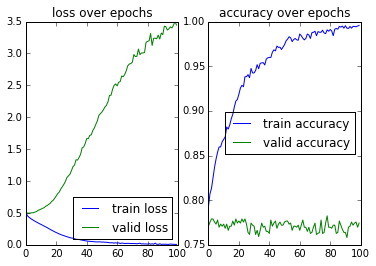

In [15]:
stats = clf.steps[-1][1]._stats # the neural net stats

plt.subplot(1, 2, 1)
plt.plot(get_stat("loss_train", stats), label="train loss")
plt.plot(get_stat("loss_valid", stats), label="valid loss")
plt.title("loss over epochs")
plt.legend(loc='best')
plt.subplot(1, 2, 2)
plt.plot(get_stat("accuracy_train", stats), label="train accuracy")
plt.plot(get_stat("accuracy_valid", stats), label="valid accuracy")
plt.title("accuracy over epochs")
plt.legend(loc='best')
plt.show()

## Regularization

one way to deal with regularization is to penalize large weights (**weight decay)**, two forms of weight decay penalties are L1 and L2, L1 penalizes the absolute value of the weights while L2 penalizes the squared value of the weights. L1 tends to give sparse values to the weights.

the parameters **L1_factor** and **L2_factor** implement weight decay. Like **activations**, they are either a list with the same size than **nb_hidden_list** giving the coeficient of regularization in each layer, or one number and in that case the same coeficient will be used everywhere.  The regularization coeficient is controlling how much you give importance to regularization compared with fitting the training data (the objective function), it must be a positive real number and it is usually very small, e.g 0.0001.

By default, no weight decay is used.

In [18]:

clf = Pipeline([
        ('scaler', StandardScaler()),
        ('neuralnet', SimpleNeuralNet(nb_hidden_list=[100, 100],
                                      max_nb_epochs=100,
                                      batch_size=10,
                                      learning_rate=0.9,
                                      L1_factor=[0.0007, 0.0007],
                                      L2_factor=[0.0007,0.0007],
                                      verbose = 1,
                                      validation_set_ratio=0.25,
                                      ))
        ])
clf.fit(X_train, y_train)

  epoch    loss_train_std    loss_train    accuracy_train    loss_valid    accuracy_valid
-------  ----------------  ------------  ----------------  ------------  ----------------
      0          0.310289       1.17082          0.778935      0.827278          0.751157
  epoch    loss_train_std    loss_train    accuracy_train    loss_valid    accuracy_valid
-------  ----------------  ------------  ----------------  ------------  ----------------
      1            0.1774      0.693522          0.782407      0.627225          0.761574
  epoch    loss_train_std    loss_train    accuracy_train    loss_valid    accuracy_valid
-------  ----------------  ------------  ----------------  ------------  ----------------
      2          0.169674      0.580446          0.789738       0.57323          0.768519
  epoch    loss_train_std    loss_train    accuracy_train    loss_valid    accuracy_valid
-------  ----------------  ------------  ----------------  ------------  ----------------
      3   

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('neuralnet', <lasagne.easy.SimpleNeuralNet object at 0xa13dfdac>)])

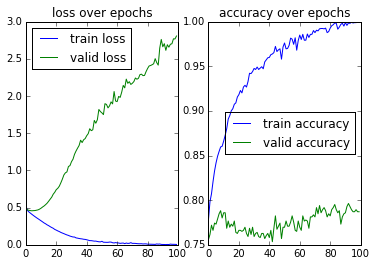

In [13]:
stats = clf.steps[-1][1]._stats # the neural net stats

plt.subplot(1, 2, 1)
plt.plot(get_stat("loss_train", stats), label="train loss")
plt.plot(get_stat("loss_valid", stats), label="valid loss")
plt.title("loss over epochs")
plt.legend(loc='best')
plt.subplot(1, 2, 2)
plt.plot(get_stat("accuracy_train", stats), label="train accuracy")
plt.plot(get_stat("accuracy_valid", stats), label="valid accuracy")
plt.title("accuracy over epochs")
plt.legend(loc='best')
plt.show()

## Visualization of the weights


one way to visualize the weights learned by the neural network is to use the **Hinton diagram** (http://wiki.scipy.org/Cookbook/Matplotlib/HintonDiagrams). Each box is a weight value, the color show the sign of the weight (two different colors are used) and the size of the boxes is the magnitude of the weight.
In our case a **green box** is a positive weight while a **red box** is a negative weight



In [16]:
clf = Pipeline([
        ('scaler', StandardScaler()),
        ('neuralnet', SimpleNeuralNet(nb_hidden_list=[10, 10],
                                      max_nb_epochs=100,
                                      batch_size=100,
                                      learning_rate=0.1,
                                      momentum=0.95,
                                      optimization_method="nesterov_momentum",
                                      verbose = 1,
                                      ))
        ])
clf.fit(X_train, y_train)

  epoch    loss_train_std    loss_train    accuracy_train
-------  ----------------  ------------  ----------------
      0          0.108755      0.603862            0.7636
  epoch    loss_train_std    loss_train    accuracy_train
-------  ----------------  ------------  ----------------
      1         0.0560564      0.495617          0.779803
  epoch    loss_train_std    loss_train    accuracy_train
-------  ----------------  ------------  ----------------
      2         0.0575859      0.468474          0.792824
  epoch    loss_train_std    loss_train    accuracy_train
-------  ----------------  ------------  ----------------
      3         0.0566145      0.455937          0.798032
  epoch    loss_train_std    loss_train    accuracy_train
-------  ----------------  ------------  ----------------
      4         0.0569944      0.447127          0.801794
  epoch    loss_train_std    loss_train    accuracy_train
-------  ----------------  ------------  ----------------
      5       

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('neuralnet', <lasagne.easy.SimpleNeuralNet object at 0x10fdade10>)])

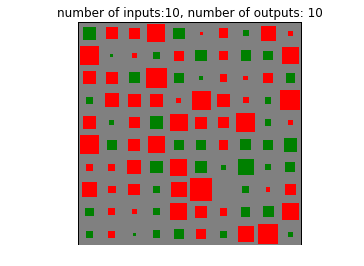

In [17]:
from lasagne.misc.hinton import hinton
from IPython.html.widgets import interact
import matplotlib.pyplot as plt
nnet = clf.steps[-1][1]

# Note that we have an additional layer here (the last) which is the output layer

@interact
def plot_weights(hidden_layer=(1, len(nnet._layers)-1)):
    layer = nnet._layers[hidden_layer].W.get_value()
    plt.clf()
    hinton(layer, fig=plt.gcf())
    plt.title("number of inputs:{0}, number of outputs: {1}".format(layer.shape[0], layer.shape[1]))
    plt.show()
